<img src="../images/python-logo.png">

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.linspace(0,2*np.pi)
np.sin(x)

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

<IPython.core.display.Javascript object>


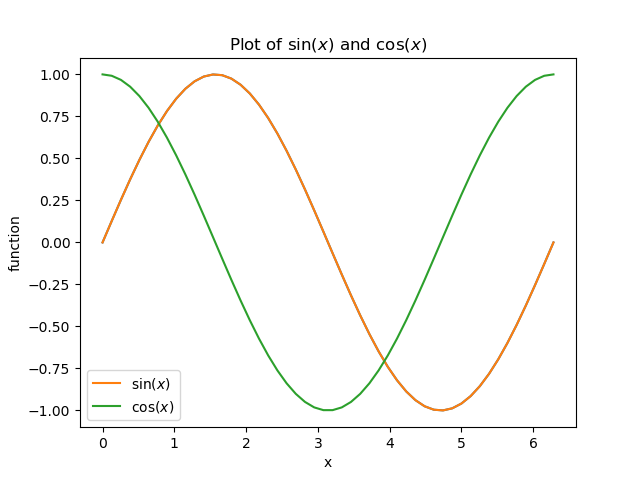

In [3]:
plt.plot(x,np.sin(x))

In [ ]:
plt.plot(x,np.sin(x),x,np.cos(x))

In [4]:
plt.plot(x,np.sin(x), label='$\sin(x)$')
plt.plot(x,np.cos(x), label='$\cos(x)$')
plt.legend()
plt.title('Plot of $\sin(x)$ and $\cos(x)$')
plt.xlabel('x')
plt.ylabel('function')

Text(22.3472,0.5,'function')

<IPython.core.display.Javascript object>


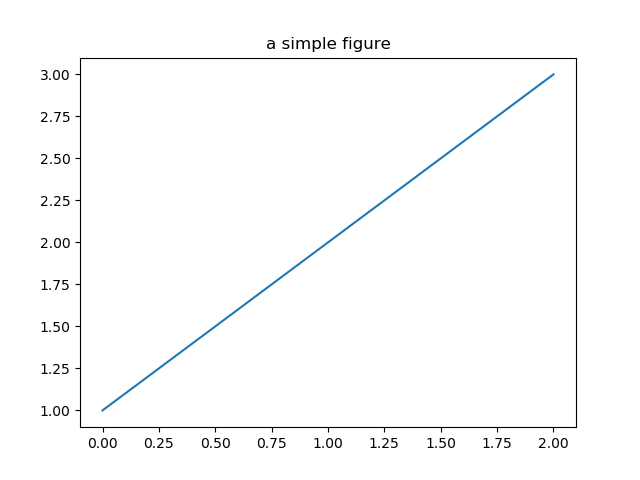

AttributeError: 'FigureCanvasNbAgg' object has no attribute 'renderer'

In [5]:

# make an agg figure
fig, ax = plt.subplots()
ax.plot([1,2,3])
ax.set_title('a simple figure')
fig.canvas.draw()

# grab the pixel buffer and dump it into a numpy array
buf = fig.canvas.buffer_rgba()
l, b, w, h = fig.bbox.bounds
# The array needs to be copied, because the underlying buffer
# may be reallocated when the window is resized.
X = np.frombuffer(buf, np.uint8).copy()
X.shape = int(h),int(w),4

# now display the array X as an Axes in a new figure
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, frameon=False)
ax2.imshow(X)
plt.show()

<IPython.core.display.Javascript object>


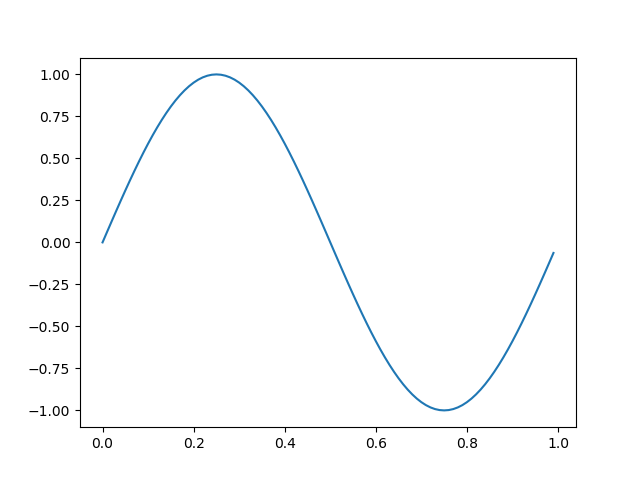

NameError: name 'connect' is not defined

In [13]:
#!/usr/bin/env python

"""
An example of how to interact with the plotting canvas by connecting
to move and click events
"""
import sys
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
fig, ax = plt.subplots()
ax.plot(t,s)


def on_move(event):
    # get the x and y pixel coords
    x, y = event.x, event.y

    if event.inaxes:
        ax = event.inaxes  # the axes instance
        print ('data coords %f %f' % (event.xdata, event.ydata))

def on_click(event):
    # get the x and y coords, flip y from top to bottom
    x, y = event.x, event.y
    if event.button==1:
        if event.inaxes is not None:
            print ('data coords %f %f' % (event.xdata, event.ydata))

binding_id = connect('motion_notify_event', on_move)
connect('button_press_event', on_click)

if "test_disconnect" in sys.argv:
    print ("disconnecting console coordinate printout...")
    disconnect(binding_id)

#plt.show()

In [14]:
# use masked arrays to plot a line with different colors by y-value
from numpy import logical_or, arange, sin, pi
from numpy import ma
from matplotlib.pyplot import  plot, show

t = arange(0.0, 2.0, 0.01)
s = sin(2*pi*t)

upper = 0.77
lower = -0.77


supper = ma.masked_where(s < upper, s)
slower = ma.masked_where(s > lower, s)
smiddle = ma.masked_where(logical_or(s<lower, s>upper), s)

plot(t, slower, 'r', t, smiddle, 'b', t, supper, 'g')
show()

<IPython.core.display.Javascript object>


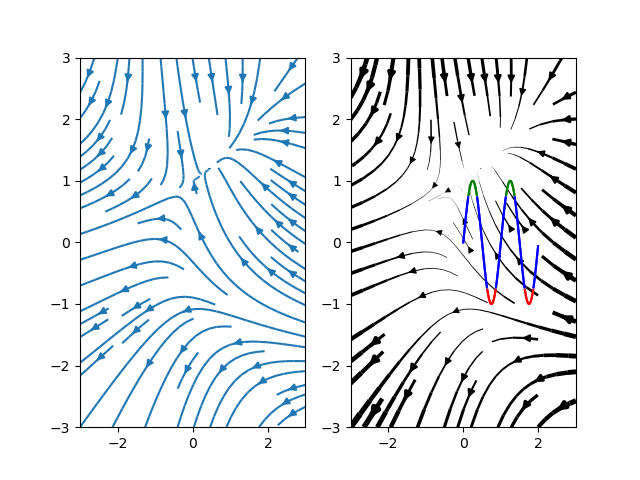

In [11]:
"""
Demo of the `streamplot` function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
"""
import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
plt.colorbar()

f, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed/speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()

<IPython.core.display.Javascript object>


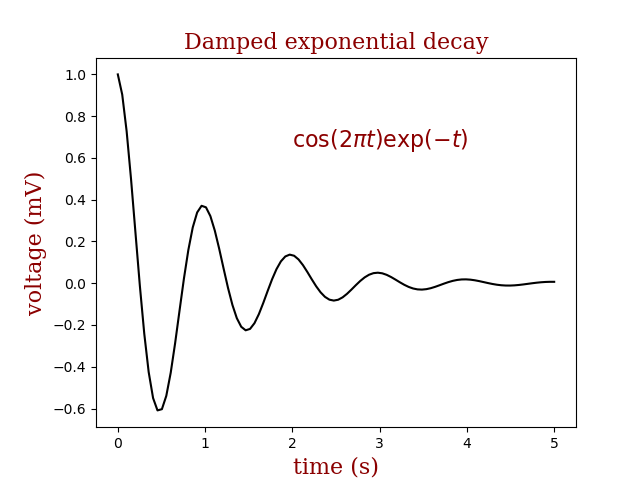

In [15]:
"""
Demo using fontdict to control style of text and labels.
"""
import numpy as np
import matplotlib.pyplot as plt


font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
        }

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)

plt.plot(x, y, 'k')
plt.title('Damped exponential decay', fontdict=font)
plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
plt.xlabel('time (s)', fontdict=font)
plt.ylabel('voltage (mV)', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

<IPython.core.display.Javascript object>


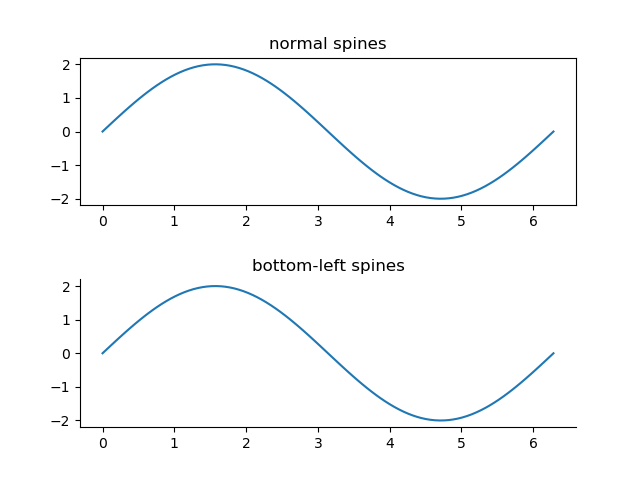

In [16]:
"""
Basic demo of axis spines.

This demo compares a normal axes, with spines on all four sides, and an axes
with spines only on the left and bottom.
"""
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi, 100)
y = 2 * np.sin(x)

fig, (ax0, ax1) = plt.subplots(nrows=2)

ax0.plot(x, y)
ax0.set_title('normal spines')

ax1.plot(x, y)
ax1.set_title('bottom-left spines')

# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)
plt.show()

<IPython.core.display.Javascript object>


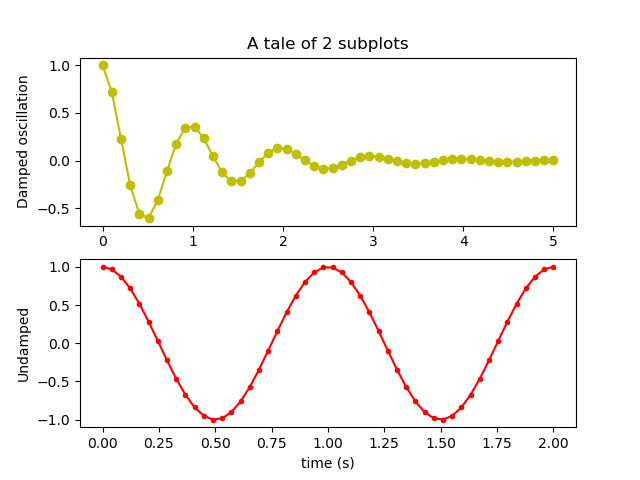

In [17]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

<IPython.core.display.Javascript object>


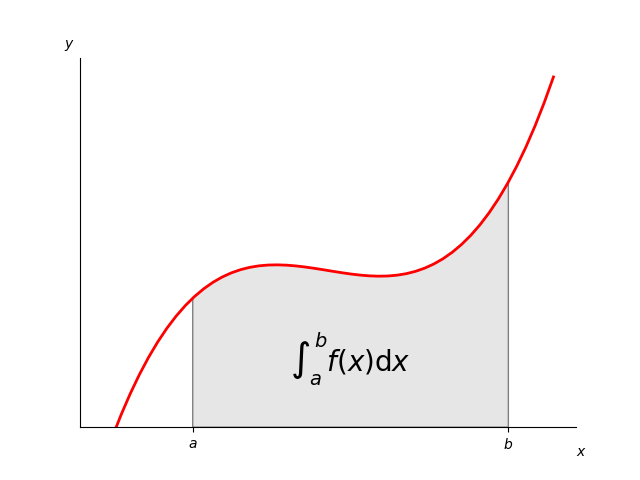

In [18]:
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9 # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

<IPython.core.display.Javascript object>


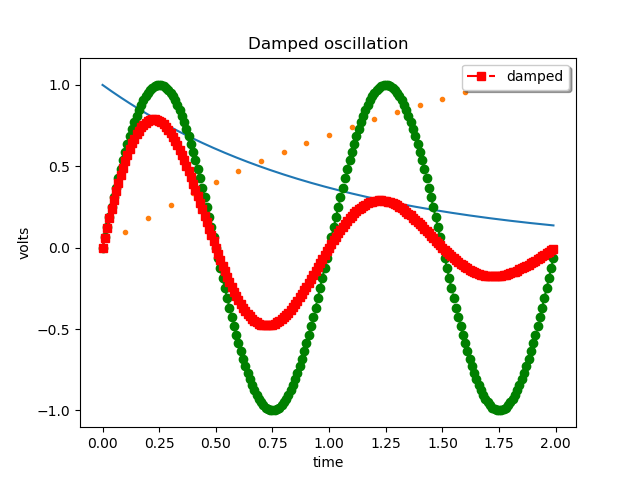

In [19]:
# Make a legend for specific lines.
import matplotlib.pyplot as plt
import numpy as np


t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(t2, np.exp(-t2))
l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', t1, np.log(1 + t1), '.')
l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.', label='damped')

plt.legend(loc='upper right', shadow=True)
plt.xlabel('time')
plt.ylabel('volts')
plt.title('Damped oscillation')
plt.show()

<IPython.core.display.Javascript object>


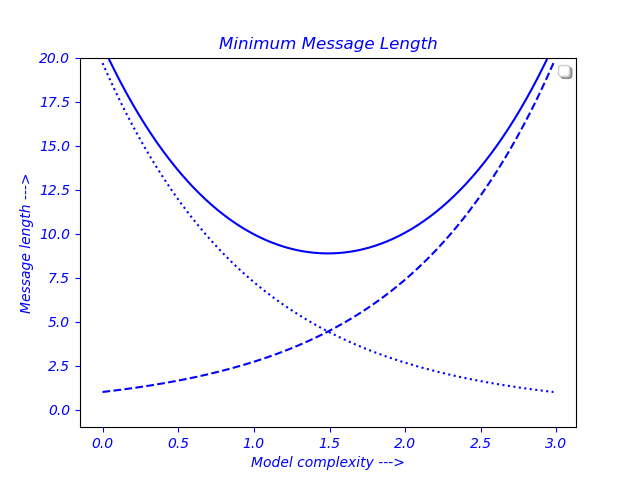

/home/kdipple1/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 'Model length' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/kdipple1/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 'Data length' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/kdipple1/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 'Total message length' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "

In [20]:
"""
Recursively find all objects that match some criteria
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as text

a = np.arange(0,3,.02)
b = np.arange(0,3,.02)
c = np.exp(a)
d = c[::-1]

fig, ax = plt.subplots()
plt.plot(a,c,'k--',a,d,'k:',a,c+d,'k')
plt.legend(('Model length', 'Data length', 'Total message length'),
           'upper center', shadow=True)
plt.ylim([-1,20])
plt.grid(False)
plt.xlabel('Model complexity --->')
plt.ylabel('Message length --->')
plt.title('Minimum Message Length')

# match on arbitrary function
def myfunc(x):
    return hasattr(x, 'set_color') and not hasattr(x, 'set_facecolor')

for o in fig.findobj(myfunc):
    o.set_color('blue')

# match on class instances
for o in fig.findobj(text.Text):
    o.set_fontstyle('italic')



plt.show()

/home/kdipple1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.
  app.launch_new_instance()


<IPython.core.display.Javascript object>


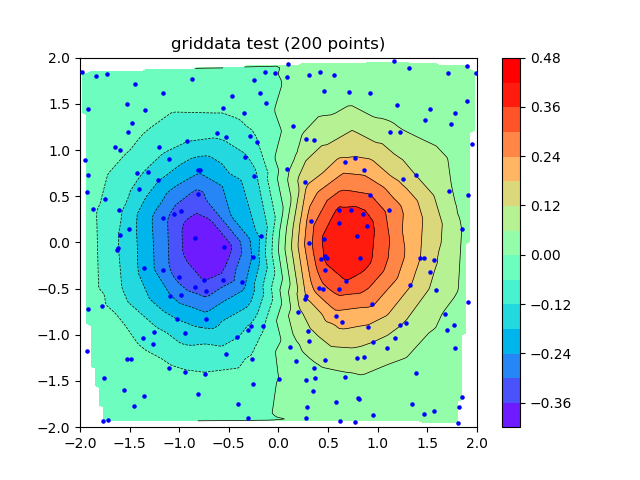

In [21]:
from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)
# define grid.
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,200)
# grid the data.
zi = griddata(x,y,z,xi,yi,interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.rainbow,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5,zorder=10)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()

# test case that scikits.delaunay fails on, but natgrid passes..
#data = np.array([[-1, -1], [-1, 0], [-1, 1],
#                 [ 0, -1], [ 0, 0], [ 0, 1],
#                 [ 1, -1 - np.finfo(np.float_).eps], [ 1, 0], [ 1, 1],
#                ])
#x = data[:,0]
#y = data[:,1]
#z = x*np.exp(-x**2-y**2)
## define grid.
#xi = np.linspace(-1.1,1.1,100)
#yi = np.linspace(-1.1,1.1,100)
## grid the data.
#zi = griddata(x,y,z,xi,yi)

<IPython.core.display.Javascript object>


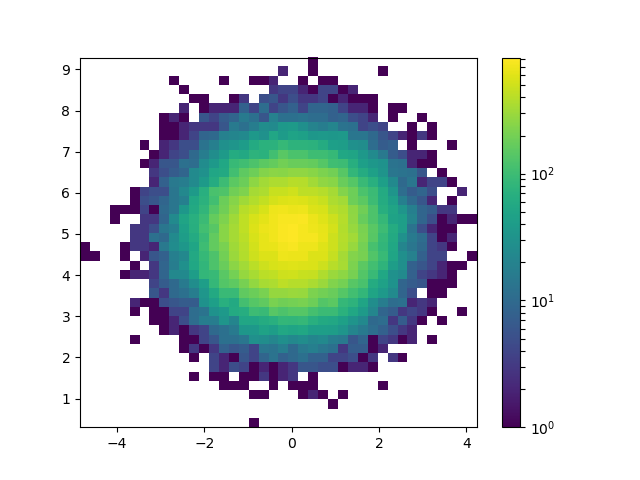

In [22]:
from matplotlib.colors import LogNorm
from pylab import *

#normal distribution center at x=0 and y=5
x = randn(100000)
y = randn(100000)+5

hist2d(x, y, bins=40, norm=LogNorm())
colorbar()
show()

<IPython.core.display.Javascript object>


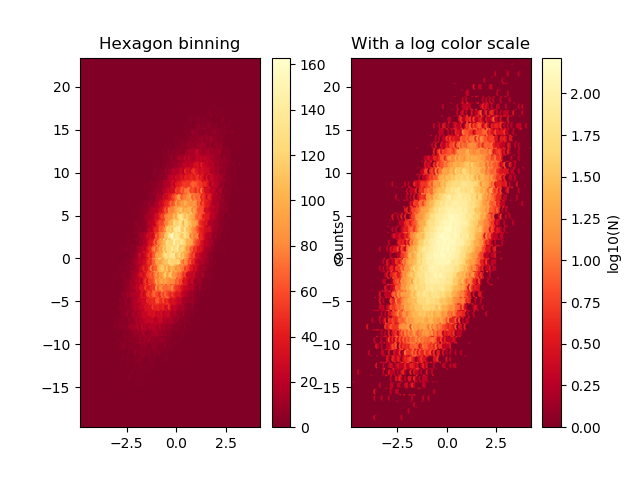

In [24]:
"""
hexbin is an axes method or pyplot function that is essentially
a pcolor of a 2-D histogram with hexagonal cells.  It can be
much more informative than a scatter plot; in the first subplot
below, try substituting 'scatter' for 'hexbin'.
"""

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

plt.subplots_adjust(hspace=0.5)
plt.subplot(121)
plt.hexbin(x,y, cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
cb = plt.colorbar()
cb.set_label('counts')

plt.subplot(122)
plt.hexbin(x,y,bins='log', cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('log10(N)')

plt.show()

<IPython.core.display.Javascript object>


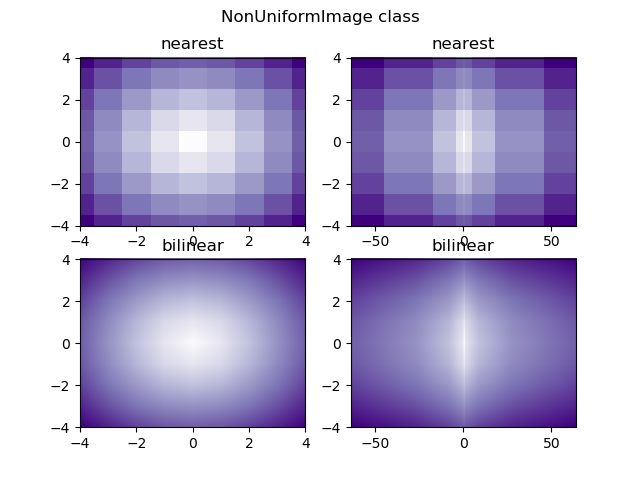

In [25]:
'''
This illustrates the NonUniformImage class, which still needs
an axes method interface; either a separate interface, or a
generalization of imshow.
'''

from matplotlib.pyplot import figure, show
import numpy as np
from matplotlib.image import NonUniformImage
from matplotlib import cm

interp='nearest'

x = np.linspace(-4, 4, 9)
x2 = x**3
y = np.linspace(-4, 4, 9)
#print 'Size %d points' % (len(x) * len(y))
z = np.sqrt(x[np.newaxis,:]**2 + y[:,np.newaxis]**2)

fig = figure()
fig.suptitle('NonUniformImage class')
ax = fig.add_subplot(221)
im = NonUniformImage(ax, interpolation=interp, extent=(-4,4,-4,4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_title(interp)

ax = fig.add_subplot(222)
im = NonUniformImage(ax, interpolation=interp, extent=(-64,64,-4,4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64,64)
ax.set_ylim(-4,4)
ax.set_title(interp)

interp = 'bilinear'

ax = fig.add_subplot(223)
im = NonUniformImage(ax, interpolation=interp, extent=(-4,4,-4,4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_title(interp)

ax = fig.add_subplot(224)
im = NonUniformImage(ax, interpolation=interp, extent=(-64,64,-4,4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64,64)
ax.set_ylim(-4,4)
ax.set_title(interp)

show()

<IPython.core.display.Javascript object>


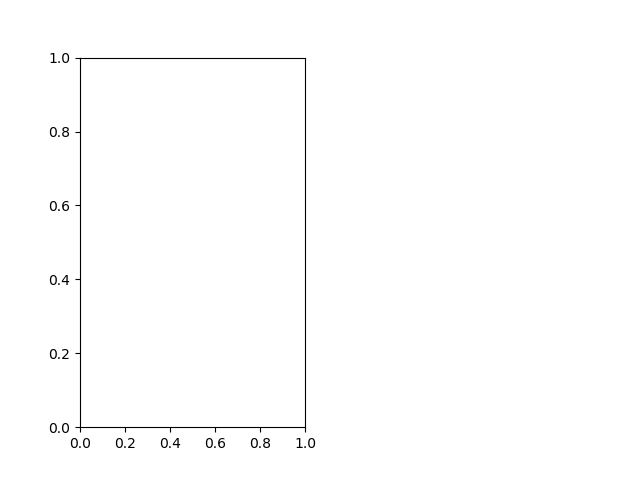

AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'

In [27]:
#!/usr/bin/env python
"""
pcolormesh uses a QuadMesh, a faster generalization of pcolor, but
with some restrictions.

This demo illustrates a bug in quadmesh with masked data.
"""

import numpy as np
from matplotlib.pyplot import figure, show, savefig
from matplotlib import cm, colors
from numpy import ma

n = 12
x = np.linspace(-1.5,1.5,n)
y = np.linspace(-1.5,1.5,n*2)
X,Y = np.meshgrid(x,y);
Qx = np.cos(Y) - np.cos(X)
Qz = np.sin(Y) + np.sin(X)
Qx = (Qx + 1.1)
Z = np.sqrt(X**2 + Y**2)/5;
Z = (Z - Z.min()) / (Z.max() - Z.min())

# The color array can include masked values:
Zm = ma.masked_where(np.fabs(Qz) < 0.5*np.amax(Qz), Z)


fig = figure()
ax = fig.add_subplot(121)
ax.set_axis_bgcolor("#bdb76b")
ax.pcolormesh(Qx,Qz,Z, shading='gouraud')
ax.set_title('Without masked values')

ax = fig.add_subplot(122)
ax.set_axis_bgcolor("#bdb76b")
#  You can control the color of the masked region:
#cmap = cm.jet
#cmap.set_bad('r', 1.0)
#ax.pcolormesh(Qx,Qz,Zm, cmap=cmap)
#  Or use the default, which is transparent:
col = ax.pcolormesh(Qx,Qz,Zm,shading='gouraud')
ax.set_title('With masked values')


show()

<IPython.core.display.Javascript object>


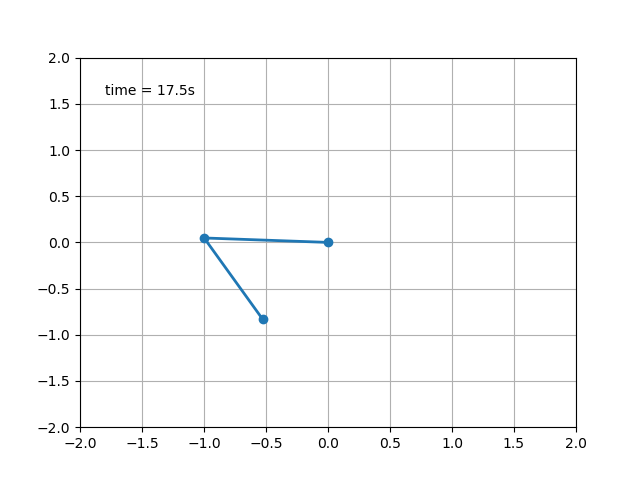

In [28]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c
%matplotlib notebook
from numpy import sin, cos, pi, array
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G =  9.8 # acceleration due to gravity, in m/s^2
L1 = 1.0 # length of pendulum 1 in m
L2 = 1.0 # length of pendulum 2 in m
M1 = 1.0 # mass of pendulum 1 in kg
M2 = 1.0 # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2]-state[0]
    den1 = (M1+M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_)
               + M2*G*sin(state[2])*cos(del_) + M2*L2*state[3]*state[3]*sin(del_)
               - (M1+M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_)
               + (M1+M2)*G*sin(state[0])*cos(del_)
               - (M1+M2)*L1*state[1]*state[1]*sin(del_)
               - (M1+M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.1 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

rad = pi/180

# initial state
state = np.array([th1, w1, th2, w2])*pi/180.

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:,0])
y1 = -L1*cos(y[:,0])

x2 = L2*sin(y[:,2]) + x1
y2 = -L2*cos(y[:,2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
    interval=25, blit=True, init_func=init)

#from IPython.display import HTML
#HTML(ani.to_jshtml())

#ani.save('double_pendulum.mp4', fps=15)
#plt.show()

In [30]:
plt.show()

<IPython.core.display.Javascript object>


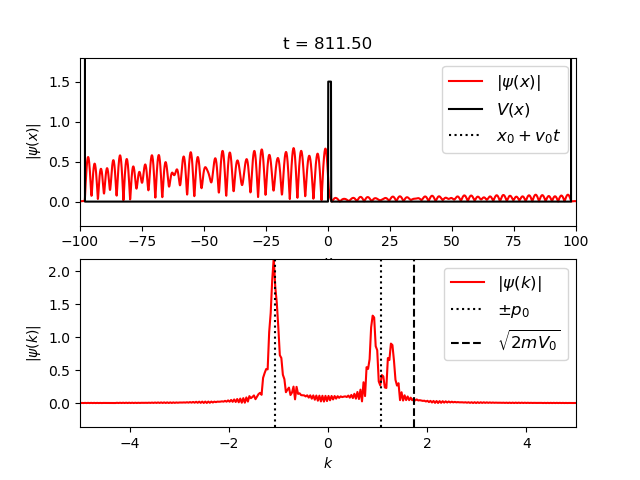

In [31]:
"""
General Numerical Solver for the 1D Time-Dependent Schrodinger's equation.

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as pl
from matplotlib import animation
from scipy.fftpack import fft,ifft


class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
        """
        Parameters
        ----------
        x : array_like, float
            length-N array of evenly spaced spatial coordinates
        psi_x0 : array_like, complex
            length-N array of the initial wave function at time t0
        V_x : array_like, float
             length-N array giving the potential at each x
        k0 : float
            the minimum value of k.  Note that, because of the workings of the
            fast fourier transform, the momentum wave-number will be defined
            in the range
              k0 < k < 2*pi / dx
            where dx = x[1]-x[0].  If you expect nonzero momentum outside this
            range, you must modify the inputs accordingly.  If not specified,
            k0 will be calculated such that the range is [-k0,k0]
        hbar : float
            value of planck's constant (default = 1)
        m : float
            particle mass (default = 1)
        t0 : float
            initial tile (default = 0)
        """
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    
    def _get_dt(self):
        return self.dt_

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)

    def time_step(self, dt, Nsteps = 1):
        """
        Perform a series of time-steps via the time-dependent
        Schrodinger Equation.

        Parameters
        ----------
        dt : float
            the small time interval over which to integrate
        Nsteps : float, optional
            the number of intervals to compute.  The total change
            in time at the end of this method will be dt * Nsteps.
            default is N = 1
        """
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in range(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps


######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))


######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

######################################################################
# Set up plot
fig = pl.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)


# uncomment the following line to save the video in mp4 format.  This
# requires either mencoder or ffmpeg to be installed on your system

#anim.save('schrodinger_barrier.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

#pl.show()